In [3]:
!pip install keras --user

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl


In [87]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import torchxrayvision as xrv

In [88]:
IMAGE_SIZE = [224, 224]

In [92]:
train_data_path = '../images'
test_data_path = 'images'
val_data_path = 'images'

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [90]:
for layer in vgg.layers:
    layer.trainable = False

In [91]:
folders = glob('images/*')
folders

[]

In [81]:
x = Flatten()(vgg.output)
print(x)

Tensor("flatten_12/Reshape:0", shape=(?, ?), dtype=float32)


In [76]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=IMAGE_SIZE + [3]))
# model.add(Conv2D(64, (3, 3), activation='relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [77]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
dropout_12 (Dropout)         (None, 222, 222, 32)      0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1577088)           0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 4731267   
Total params: 4,732,163
Trainable params: 4,732,163
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
prediction = Dense(len(folders), activation='softmax')(x)

In [83]:
model = Model(inputs=vgg.input, outputs=prediction)
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [84]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [85]:
train_dataGen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_dataGen = ImageDataGenerator(rescale=1./255)

training_set = train_dataGen.flow_from_directory('images',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')
test_set = test_dataGen.flow_from_directory('test',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 42 images belonging to 3 classes.
Found 10 images belonging to 3 classes.


In [86]:
# Fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
2/2 [==============================] - 2s 857ms/step - loss: 1.1199 - accuracy: 0.6667 - val_loss: 5.9917 - val_accuracy: 0.3000
Epoch 2/30
2/2 [==============================] - 1s 713ms/step - loss: 1.6938 - accuracy: 0.8095 - val_loss: 5.6551 - val_accuracy: 0.3000
Epoch 3/30
2/2 [==============================] - 2s 1s/step - loss: 0.8588 - accuracy: 0.8095 - val_loss: 2.6657 - val_accuracy: 0.3000
Epoch 4/30
2/2 [==============================] - 2s 946ms/step - loss: 0.6374 - accuracy: 0.6190 - val_loss: 2.0200 - val_accuracy: 0.5000
Epoch 5/30
2/2 [==============================] - 2s 958ms/step - loss: 0.5812 - accuracy: 0.8095 - val_loss: 3.2042 - val_accuracy: 0.2000
Epoch 6/30
2/2 [==============================] - 2s 957ms/step - loss: 0.3200 - accuracy: 0.8095 - val_loss: 4.4797 - val_accuracy: 0.3000
Epoch 7/30
2/2 [==============================] - 1s 737ms/step - loss: 0.3997 - accuracy: 0.8095 - val_loss: 4.5382 - val_accuracy: 0.3000
Epoch 8/30
2/2 [=======

In [61]:
import tensorflow as tf

from keras.models import load_model

In [62]:
model.save('vgg19.h5')

In [63]:
print(r.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


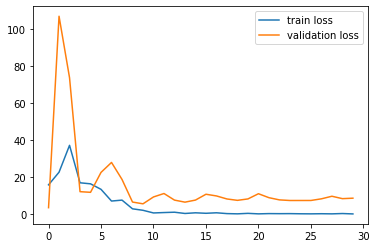

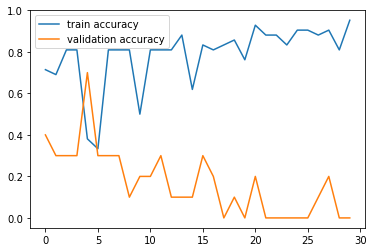

<Figure size 432x288 with 0 Axes>

In [64]:
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossValidation_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')